<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/0_Final_Project_Driver_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIÊN KẾT GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**KHAI BÁO THƯ VIỆN**



In [ ]:
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from keras.layers import LeakyReLU


**LẤY DỮ LIỆU TỪ DRIVE**

In [ ]:
test_path="/content/drive/MyDrive/Final_Project/Data/Test"
train_path="/content/drive/MyDrive/Final_Project/Data/Train"


**LẤY NGẪU NHIÊN HÌNH ẢNH TỪ TẬP DỮ LIỆU**

Text(0.5, 1.0, 'Open')

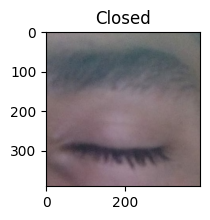

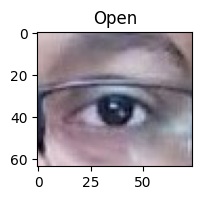

In [ ]:
import glob
import random

# Đường dẫn của thư mục chứa hình ảnh
Close = "/content/drive/MyDrive/Final_Project/Data/Train/Closed"
Open = "/content/drive/MyDrive/Final_Project/Data/Train/Open"
plt.figure(figsize=[2,2])
# Lấy danh sách tất cả các tệp hình ảnh trong thư mục
image_list = glob.glob(Close + "/*.jpg")
# Chọn một tệp ngẫu nhiên từ danh sách
random_image = random.choice(image_list)
# In ra tên tệp ngẫu nhiên
plt.imshow(plt.imread(random_image))
plt.title('Closed')
plt.figure(figsize=[2,2])
# Lấy danh sách tất cả các tệp hình ảnh trong thư mục
image_list = glob.glob(Open + "/*.jpg")
# Chọn một tệp ngẫu nhiên từ danh sách
random_image = random.choice(image_list)
# In ra tên tệp ngẫu nhiên
plt.imshow(plt.imread(random_image))
plt.title('Open')

**HỌC TĂNG CƯỜNG**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=0.2, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(32,32),
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(32,32),
                                            batch_size=32,
                                            class_mode='categorical')


Found 1238 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


**CẤU TRÚC CNN**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (32,32,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation= 'relu', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dropout(0.25))
model.add(Dense(2, activation= 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                        

**TRAIN DỮ LIỆU**

In [ ]:
steps_per_epoch= len(train_set.classes)//32
validation_steps = len(test_set.classes)//32
train = model.fit(train_set, validation_data=test_set,epochs=100,steps_per_epoch=steps_per_epoch ,validation_steps=validation_steps)

Epoch 1/100
38/38 [==============================] - 176s 4s/step - loss: 0.7476 - accuracy: 0.5481 - val_loss: 0.6449 - val_accuracy: 0.8021
Epoch 2/100
38/38 [==============================] - 7s 178ms/step - loss: 0.4516 - accuracy: 0.8176 - val_loss: 0.2320 - val_accuracy: 0.9271
Epoch 3/100
38/38 [==============================] - 7s 195ms/step - loss: 0.2648 - accuracy: 0.8905 - val_loss: 0.1529 - val_accuracy: 0.9427
Epoch 4/100
38/38 [==============================] - 7s 178ms/step - loss: 0.2025 - accuracy: 0.9254 - val_loss: 0.1578 - val_accuracy: 0.9583
Epoch 5/100
38/38 [==============================] - 8s 199ms/step - loss: 0.1640 - accuracy: 0.9403 - val_loss: 0.1626 - val_accuracy: 0.9479
Epoch 6/100
38/38 [==============================] - 8s 220ms/step - loss: 0.1530 - accuracy: 0.9362 - val_loss: 0.1634 - val_accuracy: 0.9375
Epoch 7/100
38/38 [==============================] - 6s 169ms/step - loss: 0.1562 - accuracy: 0.9378 - val_loss: 0.1443 - val_accuracy: 0.9531


**LƯU DỮ LIỆU PHỤC VỤ CHO VIỆC CHẨN ĐOÁN**

In [ ]:
model.save('/content/drive/MyDrive/Final_Project/Driver_Drowsiness_Detection.h5')

**VẼ ĐỒ THỊ ĐỘ CHÍNH XÁC SAU QUÁ TRÌNH TRAIN**

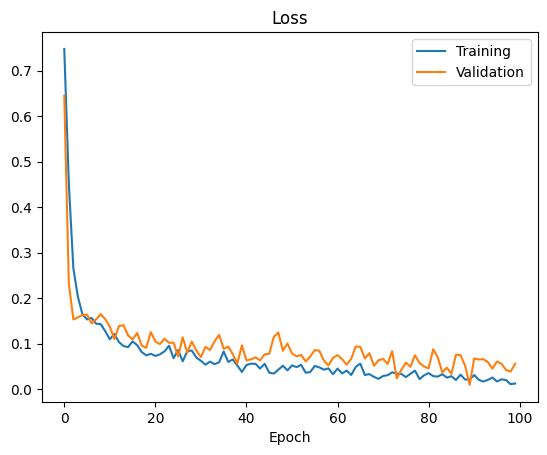

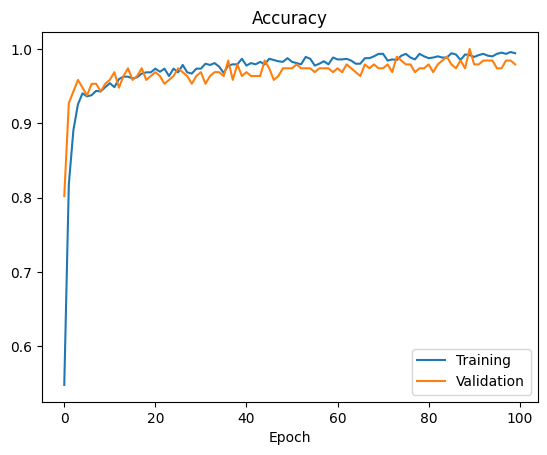

In [ ]:
plt.figure(0)
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('Epoch')


plt.figure(1)
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

**CHẨN ĐOÁN DỮ LIỆU TRÊN GOOGLE COLAB**

Saving Test_Closed.jpg to Test_Closed.jpg


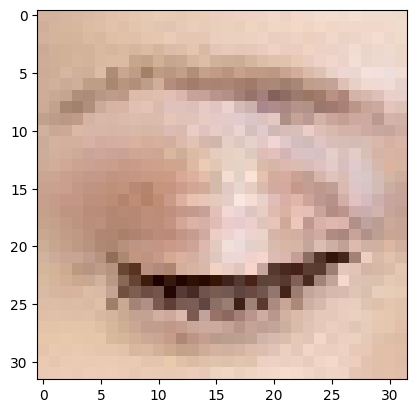

1/1 [==============================] - 0s 162ms/step
Hình ảnh với mắt đang nhắm


In [ ]:
from google.colab import files
import matplotlib.image as mpimg
from matplotlib.image import imread
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))
model = load_model('/content/drive/MyDrive/Final_Project/Driver_Drowsiness_Detection.h5')
img = load_img(path,target_size=(32,32))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
predict = model.predict(img)
Gia_Tri = np.argmax(predict)
if (Gia_Tri == 0) :
  print('Hình ảnh với mắt đang nhắm')
if (Gia_Tri == 1) :
  print('Hình ảnh với mắt đang mở')

Saving Test_Open.jpg to Test_Open.jpg


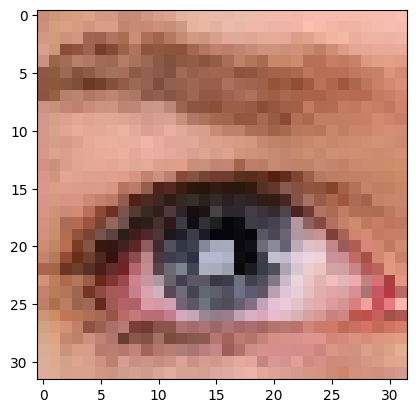

1/1 [==============================] - 0s 64ms/step
Hình ảnh với mắt đang mở


In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))
model = load_model('/content/drive/MyDrive/Final_Project/Driver_Drowsiness_Detection.h5')
img = load_img(path,target_size=(32,32))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
predict = model.predict(img)
Gia_Tri = np.argmax(predict)
if (Gia_Tri == 0) :
  print('Hình ảnh với mắt đang nhắm')
if (Gia_Tri == 1) :
  print('Hình ảnh với mắt đang mở')